In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [54]:
df = pd.read_csv("Restaurant_Reviews.tsv",delimiter="\t")

In [55]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [56]:
df['Liked'] = df['Liked'].replace({0:'Not Satisfied',1:'Satisfied'})
df.head()


,Review,Liked
0,Wow... Loved this place.,Satisfied
1,Crust is not good.,Not Satisfied
2,Not tasty and the texture was just nasty.,Not Satisfied
3,Stopped by during the late May bank holiday of...,Satisfied
4,The selection on the menu was great and so wer...,Satisfied


In [58]:
df['Liked'] = df['Liked'].apply(lambda x: f"{x} {'😊' if x == 'Satisfied' else '😞'}")

In [59]:
df.head()

,Review,Liked
0,Wow... Loved this place.,Satisfied 😊
1,Crust is not good.,Not Satisfied 😞
2,Not tasty and the texture was just nasty.,Not Satisfied 😞
3,Stopped by during the late May bank holiday of...,Satisfied 😊
4,The selection on the menu was great and so wer...,Satisfied 😊


C:\Users\alnzy\AppData\Local\Temp\ipykernel_2004\469017896.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=sentiment_counts, x='Liked', y='Count', palette='viridis')


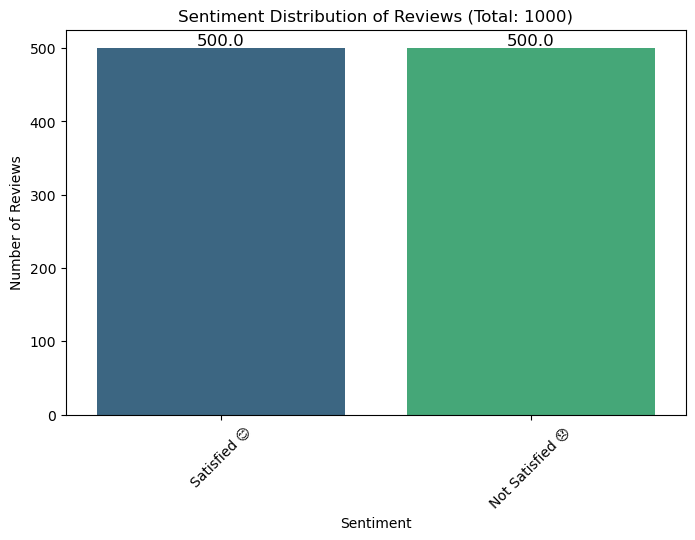

In [60]:

label_encoder = LabelEncoder()
df['Liked_encoded'] = label_encoder.fit_transform(df['Liked'])

sentiment_counts = df['Liked'].value_counts().reset_index()
sentiment_counts.columns = ['Liked', 'Count']


plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=sentiment_counts, x='Liked', y='Count', palette='viridis')


for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=12)

# إضافة العدد الكلي في العنوان
total_count = sentiment_counts['Count'].sum()
plt.title(f'Sentiment Distribution of Reviews (Total: {total_count})')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

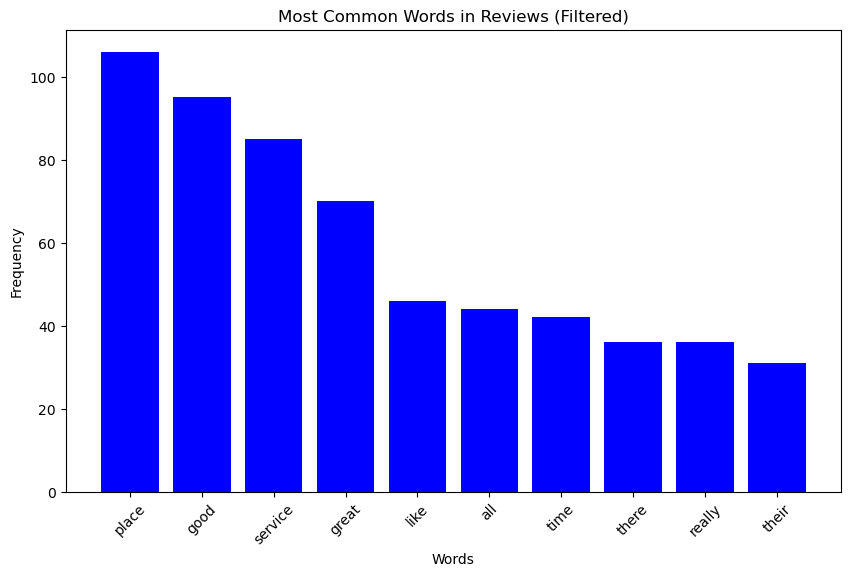

In [61]:
stop_words = set([
    'the', 'is', 'are', 'am', 'was', 'were', 'this', 'that', 
    'it', 'its', 'have', 'has', 'had', 'do', 'does', 'doing', 
    'a', 'an', 'and', 'but', 'or', 'to', 'in', 'on', 'for', 
    'with', 'by', 'at', 'from', 'of', 'as', 'if', 'then', 
    'will', 'would', 'can', 'could', 'should', 'i', 'just' ,'not' ,'be'  ,'very' ,'food' ,'t'  ,'my' ,'so' ,'we'  ,'they' ,'here' 
    ,'go' ,'you'  ,'back' ,'our' ,'s'  ,'back' 
])

all_reviews = ' '.join(df['Review'])
words = re.findall(r'\b\w+\b', all_reviews.lower())
filtered_words = [word for word in words if word not in stop_words]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(10)  
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Reviews (Filtered)')
plt.xticks(rotation=45)
plt.show()

In [62]:
print("DataFrame:")
print(df)

print("\nColumns in DataFrame:")
print(df.columns)

DataFrame:
                                                Review            Liked  \
0                             Wow... Loved this place.      Satisfied 😊   
1                                   Crust is not good.  Not Satisfied 😞   
2            Not tasty and the texture was just nasty.  Not Satisfied 😞   
3    Stopped by during the late May bank holiday of...      Satisfied 😊   
4    The selection on the menu was great and so wer...      Satisfied 😊   
..                                                 ...              ...   
995  I think food should have flavor and texture an...  Not Satisfied 😞   
996                           Appetite instantly gone.  Not Satisfied 😞   
997  Overall I was not impressed and would not go b...  Not Satisfied 😞   
998  The whole experience was underwhelming, and I ...  Not Satisfied 😞   
999  Then, as if I hadn't wasted enough of my life ...  Not Satisfied 😞   

     Liked_encoded  
0                1  
1                0  
2                0  
3   

In [70]:


# تقسيم البيانات إلى ميزات (X) وأهداف (y)
X = df['Review']
y = df['Liked']

# تقسيم البيانات إلى مجموعة تدريب ومجموعة اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تحويل النصوص إلى تمثيلات عددية باستخدام TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# إنشاء نموذج الانحدار اللوجستي
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# التنبؤ على مجموعة الاختبار
y_pred = model.predict(X_test_tfidf)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_result)

Accuracy: 0.795
Classification Report:
                  precision    recall  f1-score   support

Not Satisfied 😞       0.75      0.85      0.80        96
    Satisfied 😊       0.85      0.74      0.79       104

       accuracy                           0.80       200
      macro avg       0.80      0.80      0.79       200
   weighted avg       0.80      0.80      0.79       200

